# Comentátios sobre a análise do Projeto 3

#### Estudando a influência das tags na quantidade de visualizações de um vídeo "em alta" no YouTube.

In [26]:
import matplotlib.pyplot as plt
#importando os DataFrames criados
%store -r dfl
%store -r you_data
%store -r trans
%store -r you_analysis
%store -r banana
%store -r you_ifn

no stored variable a
no stored variable b


In [5]:
you_data.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
10,9wRQljFNDW8,17.14.11,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13T02:05:26.000Z,NFL|Football|offense|defense|afc|nfc|American ...,81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...


Iniciamos com um DataFrame obtido a partir de um WebScrapper que contém informações não uteis para o estudo. Restringimos as variáveis analizadas a:

    -Views
    -Title
    -Tags
    -Category_id
    
Percebemos que os dados foram minerados ao longo de um grande período, assim vídeos que estavam na seção "Em alta" por mais de um dia se repetiam, logo foram mantidas somente a utima aparição de cada vídeo.

Com o DataFrame limpo foi adicionado uma coluna para cada tag, onde se o vídeo possuia essa tag, a frequencia total (quantidade de vezes que essa tag foi utilizada no DataFrame) é adicionada a linha, caso não tenha a tag o espaço é preenchido com um 0.


In [15]:
you_analysis.tail(2) #DataFrame limpo e com as colunas de tags

,views,title,tags,category_id,tags_split,funny_freq,comedy_freq,humor_freq,comedian_freq,music_freq,...,Chance_freq,90s_freq,rescue_freq,burn_freq,north korea_freq,itsalexclark_freq,hack_freq,Tofield_freq,LL_freq,science experiment_freq
40947,5660813,How Black Panther Should Have Ended,Black Panther|HISHE|Marvel|Infinity War|How It...,1,"[Black Panther, HISHE, Marvel, Infinity War, H...",0,515,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40948,10306119,Official Call of Duty®: Black Ops 4 — Multipla...,call of duty|cod|activision|Black Ops 4,20,"[call of duty, cod, activision, Black Ops 4]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
dfl.head(5) #frequencia de cada tag

,tags,counts
0,funny,631
1,comedy,515
2,humor,277
3,comedian,227
4,music,213


Para iniciar a anlálise separamos a quantidade de views de a frenquência da teg de maior frequência, para poder fazer uma scatter plot.


In [20]:
banana.head(1)

,views,max_freq
10,81377,141


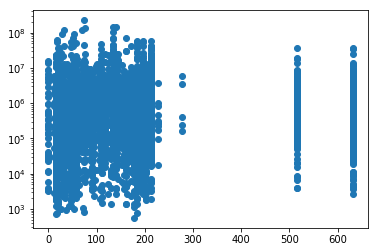

In [23]:
ax = plt.gca()
ax.scatter(banana.max_freq, banana.views)
ax.set_yscale('log')

Contudo percebemos que não é rasoável levar em conta apenas uma tag, assim foi feito um novo scatter plot da quantidade de views pela soma da frequência das 3 tags de maior frequência